# ME144 - Heat Transfer - Homework 6
### Eric Kuhn
### Luke Marcoon
### Machlan Pettersen
### Due 4/30/21

In [1]:
from Libraries import thermodynamics as thermo
from Libraries import HT_internal_convection as intconv
from Libraries import HT_thermal_resistance as res
from Libraries import HT_natural_convection as natconv

import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.constants as csts

import schemdraw as schem
import schemdraw.elements as e

## Problem 8.42

### The atmospheric air enters a 10 m long, 150 mm diameter uninsulated heating duct at 60$^o$C and 0.04 $\frac{kg}{s}$. The duct surface temperature is approximately constant at $T_s=$ 15$^o$C.
##### (a) What is the outlet air temperature $T_o$, the heat rate, $q$ and the pressure drop $\Delta p$ for these conditions?
##### (b) To illustrate the tradeoff between the heat transfer rate and pressure drop considerations, calculate $q$ and $\Delta p$ for diameters in the range from 0.1 to 0.2 m. In your analysis, maintain the total surface area, $A_s = \pi D L$, at the value computed for part (a). Plot $q$, $\Delta p$, and $L$ as a function of the duct diameter.

In [2]:
#Variables
L = 10 #m 
D = 150e-3 #m
T_i = 60 #C
T_s = 15 #C
mdot = 0.04 #kg/s

#Cross-sectional area
A = (np.pi/4)*(D)**2

#Thermal Circuit
Rp = []
Rp.append(res.Resistance("$R'_{conv,int}","W/m"))
Rp.append(res.Resistance("$R'_{cond,p}","W/m"))
Rp.append(res.Resistance("$R'_{conv,ext}","W/m"))

#Thermodynamic properties of air at mean film temp T_m
T_m = (T_i+T_s)/2 #C
airprop = thermo.Fluid('air',T_m,"C")

#Declaring duct via PipeFlow
duct = intconv.PipeFlow(D, mdot = 0.04, nu = airprop.nu, rho = airprop.rho)
#print("The Reynolds number for the flow is: %.1f" %duct.Re)

#Using the Dittus Boelter relation to solve for Nu 
duct.Dittus_Boelter("cooling", Pr=airprop.Pr, Re = duct.Re)

#Applying Nusselt number to solve for average heat transfer coefficient h
h = (airprop.k/D)*(duct.Nu)
#print("The average heat transfer coefficient for the duct is %.2f W/m^2.K" %h)

#Solving for T_o with exponential correlation
T_o = T_s - ((T_s - T_i)*math.exp(-(np.pi*D*L*h)/(mdot*airprop.Cp)))
print("The outlet air temperature is %.2f C" %T_o)

#Solving for the heat rate
q = mdot*airprop.Cp*(T_o - T_i)
print("The heat transfer rate is %.3f W" %q)

#Solving for friction factor for turbulent pipe flow
duct.f_turbulent(Re=duct.Re)

#Applying f to solve for mean velocity
u_m = mdot/(airprop.rho*A)

#Applying mean velocity and friction factor f to solve for the pressure drop
DeltaP = (duct.f*airprop.rho*(u_m**2)*L)/(2*D)
print("The pressure drop wrt the length of the duct is %.2f Pa" %DeltaP)

Warning Reynolds number is not defined
The outlet air temperature is 29.98 C
The heat transfer rate is -1206.741 W
Pipe wall is assumed to be hydrodynamically smooth
The pressure drop wrt the length of the duct is 4.00 Pa


Warning Reynolds number is not defined
Pipe wall is assumed to be hydrodynamically smooth
Warning Reynolds number is not defined
Pipe wall is assumed to be hydrodynamically smooth
Warning Reynolds number is not defined
Pipe wall is assumed to be hydrodynamically smooth
Warning Reynolds number is not defined
Pipe wall is assumed to be hydrodynamically smooth
Warning Reynolds number is not defined
Pipe wall is assumed to be hydrodynamically smooth
Warning Reynolds number is not defined
Pipe wall is assumed to be hydrodynamically smooth
Warning Reynolds number is not defined
Pipe wall is assumed to be hydrodynamically smooth
Warning Reynolds number is not defined
Pipe wall is assumed to be hydrodynamically smooth
Warning Reynolds number is not defined
Pipe wall is assumed to be hydrodynamically smooth
Warning Reynolds number is not defined
Pipe wall is assumed to be hydrodynamically smooth


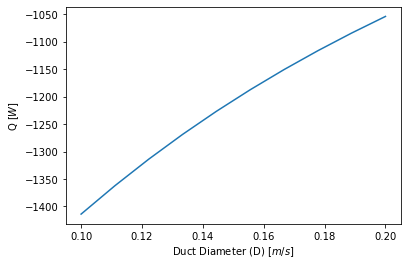

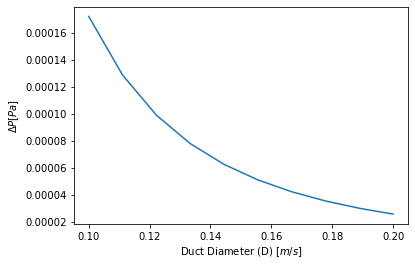

In [3]:
#Plotting q and DeltaP for diameters ranging from 0.1 to 0.2 m

#Variables
N = 10
q = np.zeros(N)
DeltaP = np.zeros(N)
D = np.linspace(0.1,0.2,N) #m
A = np.zeros(N)
#h = np.zeros(N)
L = 10 #m 
T_i = 60 #C
T_o = np.zeros(N)
T_s = 15 #C
mdot = 0.04 #kg/s

#Thermodynamic properties of air at mean film temp T_m
T_m = (T_i+T_s)/2 #C
airprop = thermo.Fluid('air',T_m,"C")

#Cross-sectional area
for i in range(N):
    A = (np.pi*D[i]*L)
    #Declaring duct via PipeFlow
    duct = intconv.PipeFlow(D[i], mdot = 0.04, nu = airprop.nu, rho = airprop.rho)
    
    duct.Dittus_Boelter("cooling", Pr=airprop.Pr, Re = duct.Re)
    h = (airprop.k/D[i])*(duct.Nu)
    
    T_o = T_s - ((T_s - T_i)*math.exp(-(np.pi*D[i]*L*h)/(mdot*airprop.Cp)))
    
    q[i] = mdot*airprop.Cp*(T_o - T_i)
    
    duct.f_turbulent(Re=duct.Re)
    u_m = mdot/(airprop.rho*A)
    
    DeltaP[i] = (duct.f*airprop.rho*(u_m**2)*L)/(2*D[i])
    
## Plot 1 - heat rate
plt.plot(D,q)
plt.xlabel("Duct Diameter (D) $[m/s]$")
plt.ylabel("Q $[W]$")
plt.show()

# Plot 2 - pressure drop
plt.plot(D,DeltaP)
plt.xlabel("Duct Diameter (D) $[m/s]$")
plt.ylabel("$\Delta P [Pa]$")
plt.show()

# Problem 8.62

Water at a flow rate of $\dot{m}$ = 0.215 kg/s is cooled from $70^\circ\mathrm{C}$ to $30^\circ\mathrm{C}$ by passing it through a thin-walled tube of diameter $D$ = 50 mm and maintaining a coolant at $T_{\infty}$ = $15^\circ\mathrm{C}$ in cross flow over the tube. 

(a) What is the required tube length if the coolant is air and its velocity is $V$ = 20 m/s?

(b) What is the tuve length if the coolant is water and $V$ = 2 m/s?

In [4]:
T_m = (70+30)/2
T_infty = 15 #C
T_mi = 70 #C
T_mo = 30 #C
T_f = (T_infty + T_m)/2 #C
mdot = 0.215 #kg/s
D = 0.05 #m
water = thermo.Fluid('water',T_m,"C")
air_c = thermo.Fluid('air',T_f,"C")
water_c = thermo.Fluid('water',T_f,"C")

q =mdot*water.Cp*(70-30)
#Finding log mean temperature, initial Reynolds number, and friction factor
T_lm = -(T_mi - T_mo)/np.log((T_infty-T_mo)/(T_infty-T_mi))
Re_i = (4*mdot)/(np.pi*D*water.mu)
f = (0.79*np.log(Re_i))**-2

#Gnielinski
Nu_i = ((f/8)*(Re_i-1000)*water.Pr)/(1+12.7*(((f/8)**.5))*((water.Pr**(2/3))-1))

h_i = Nu_i*(water.k/D)
#Reynolds number at outlet
Re_o_1 = (20*D)/air_c.nu

#Seban, constant T_s
Nu_o_1 = 5+0.025*(Re_o_1*water.Pr)**0.8
h_o_1 = Nu_o_1*water.k/D

Q = ((1/h_i)+(1/h_o_1))**-1

L_1 = q/(Q*np.pi*D*T_lm)
print("The required length if the coolant is air at 20 m/s is %.2f m."%L_1)

Re_o_2 = (2*D)/(water_c.nu)
Nu_o_2 = 5+0.025*(Re_o_2*water.Pr)**0.8
h_o_2 = Nu_o_2*water.k/D

Q_2 = ((1/h_i)+(1/h_o_2))**-1
L_2 = q/(Q_2*np.pi*D*T_lm)
print("The required length if the coolant is water at 2 m/s is %.2f m."%L_2)

The required length if the coolant is air at 20 m/s is 15.13 m.
The required length if the coolant is water at 2 m/s is 14.58 m.


## Problem 9.39
### The thermal conductivity and the surface emissivity of a material may be determined by heating its bottom surface and exposing its top surface to quiescent air and a large surroundings of equivalent temperatures, $T_{\infty} = T_{sur} = 25^o$C. The remaining surfaces of the sample/heater are well insulated.

### Consider a sample of thickness $L =$ 25 mm and a square planform of width $W=$ 250 mm. In an experiment performed under steady-state conditions, temperature measurements made at lower and upper surface of the sample yields values of $T_1 =$ 150$^o$C and $T_2 =$ 100$^o$C, respectively, for a power input of $P_{elec} =$ 70 W. What are the thermal conductivity and emissivity of the sample?

In [5]:
T_sur = T_infty = 25 #C
L = 25e-3 #m
W = 250e-3 #m
T_1 = 150 #C
T_2 = 100 #C
P_elec = 70 #W

A = W**2

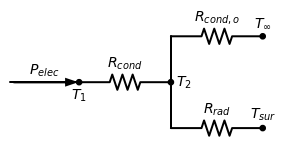

In [6]:
Rp = []
Rp.append(res.Resistance("$R_{cond}$","W/m"))
Rp.append(res.Resistance("$R_{cond,o}$","W/m"))
Rp.append(res.Resistance("$R_{rad}$","W/m"))

d = schem.Drawing()
L1 = d.add(e.LINE, toplabel = "$P_{elec}$", endpts = [[-2.25, 0],[0, 0]])
d.labelI(L1, arrowofst = 0)
d.add(e.DOT, botlabel='$T_1$')
R0 = d.add(e.RES, d='right', label=Rp[0].name)
d.add( e.DOT, rgtlabel='$T_2$')
d.push()
d.add(e.LINE, l = 1.5, d = 'up')
R3 = d.add( e.RES, d='right', label=Rp[1].name )
d.add( e.DOT, label='$T_{\infty}$')
d.pop()
d.add(e.LINE, d='down', l = 1.5)
R4 = d.add( e.RES, d='right', label=Rp[2].name )
d.add( e.DOT, label='$T_{sur}$')
d.draw()

In [7]:
##Properties of ambient air at film temperature
T_m = (T_2+T_infty)/2
airprop = thermo.Fluid('air',T_m,"C")

#Fourier's Law for conduction, solving for conductivity in the slab where P_elec = Q_cond
k = ((P_elec)/(W**2))*(L/(T_1-T_2))
print("The thermal conductivitiy of the material is %.2f W/m.K" %k)

?natconv


The thermal conductivitiy of the material is 0.56 W/m.K


Applying the conservation of energy:

$$
P_{elec} = Q_{conv,0} + Q_{rad}
$$

where

$$
Q_{conv,o} = h_L A (T_2 - T_{infty})
$$

and

$$
Q_{rad} = \sigma \epsilon A (T^4_2 - T^4_{\infty})
$$

resulting in:

$$
P_{elec} = h_L A dT + \sigma \epsilon A (T^4_2 - T^4_{\infty})
$$

Solving for $\epsilon$:

$$
\epsilon = \frac{P_{elec}-hAdT}{\sigma A (T^4_2 - T^4_{\infty})}
$$

In [8]:
Ra_L = natconv.Ra(g=9.81, beta=airprop.beta, DT=(T_2-T_infty), D =(W/4), nu = airprop.nu, alpha = airprop.alpha)

h = (airprop.k*0.54*(Ra_L**(1/4)))/(W/4)

eps = (P_elec - h*A*(T_2-T_infty))/((5.67*10**-8)*A*((thermo.C2K(T_2)**4)-(thermo.C2K(T_infty)**4)))
print("The emissivitity of the slab is %.3f" %eps)

The emissivitity of the slab is 0.809


# Problem 9.18        
Luke Marcoon

During a winter day, the window of a patio door with a height of 1.8 m and width of 1.0 m shows a frost line near its base. The room wall and air temperatures are $15^{\circ}C$

a) Explain why the window would show a frost layer at the base rather than the top.

b) Estimate the heat loss through the window due to free convection and radiation. Assume the window has a uniform temperature of $0^{\circ}C$ and the emmisivity of the glass surface is 0.94. If the room has electric baseboard heating, estimate the corresponding daily cost of the window heat loss for a utility rate of $0.18 {$/kWh}$

### Assumptions
 1) steady state condition <br>
 2) window has a uniform temperature <br>
 3) room walls are isothermal and large compared to the window <br>

## Solution
a) The window shows a frost layer at the base rather than the top beacuse the boundary layer is thinnest at the top of the window, therefore the heat flux from the interior is greater than at the bottom of the window. Additionally the air in the room could naturally be cooler near the floor than near the ceiling, i.e. stratified.

b) The heat loss from the room to the window having a uniform temperature $T_s = 0^{\circ}C$ by convection and radiation is <br> $q_{loss} = q_{conv} + q_{rad}$ <br>
$q_{loss} = A_s [h_L(T_\infty - T_s) + \epsilon\sigma (T_{sur}^4 -T_s^4)]$ <br>

In [10]:
from Libraries import thermodynamics as thermo
from Libraries import HT_external_convection as extconv
import numpy as np
import schemdraw as schem
import math
import matplotlib.pyplot as plt
import scipy.constants as csts

Ra_L = 1.084e10
nu_L = 258.9
h_L = 3.6 #W/m^2 K
sigma = 5.67e-8 #W/m^2k^4
A_s = 1.8 #m^2
T_infty = 15 # K
epsilon = 0.940 #emissivity
T_sur = 288 # K
T_s = 273 # K
rate = 0.18 # $/kWh
time = 24 # hours

q_loss = A_s * (h_L * (T_infty) + (epsilon * sigma * ((T_sur ** 4) - (T_s ** 4))))

cost = q_loss * 10**-3 * rate * time
print("The daily cost of the windows heat loss for the given utility rate is %.3f $/day" %cost)

The daily cost of the windows heat loss for the given utility rate is 0.969 $/day
